## **DataSet Introduction**

Drug Dataset is taken from UCI Machine Learning Repository 

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## **Importing Libraries**


In [28]:
import sys
print(sys.executable)

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

nltk.download('stopwords')

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
#import lightgbm as lgb

#pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
import string


/Users/minazaeimzadeh/opt/anaconda3/bin/python


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/minazaeimzadeh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minazaeimzadeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Load** **Dataset**

In [29]:
## Load Dataset

drugstrain = pd.read_csv("/Users/minazaeimzadeh/Documents/Mina/IIT/5-Fall2022/CS584/Project/DrugSentimentalAnalysis/SentimentalAnalysis/dataset/drugsComTrain_raw.tsv", sep='\t')
drugstest = pd.read_csv("/Users/minazaeimzadeh/Documents/Mina/IIT/5-Fall2022/CS584/Project/DrugSentimentalAnalysis/SentimentalAnalysis/dataset/drugsComTest_raw.tsv", sep='\t')
libtrain = pd.read_csv("/Users/minazaeimzadeh/Documents/Mina/IIT/5-Fall2022/CS584/Project/DrugSentimentalAnalysis/SentimentalAnalysis/dataset/drugLibTrain_raw.tsv", sep='\t')
libtest = pd.read_csv("/Users/minazaeimzadeh/Documents/Mina/IIT/5-Fall2022/CS584/Project/DrugSentimentalAnalysis/SentimentalAnalysis/dataset/drugLibTest_raw.tsv", sep='\t')


**Preparing DataSet**

In [30]:
## Drugs Com Data  Info
print("---------------TRAIN DATA INFO-------------------")
print(drugstrain.info())
print("---------------TEST DATA INFO-------------------")
print(drugstest.info())

---------------TRAIN DATA INFO-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None
---------------TEST DATA INFO-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       5

In [31]:
## Lib Com Data  Info
print("---------------TRAIN DATA INFO-------------------")
print(libtrain.info())
print("---------------TEST DATA INFO-------------------")
print(libtest.info())

---------------TRAIN DATA INFO-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None
---------------TEST DATA INFO-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0      

In [32]:
#Renaming the Columns Of Test & Train Dataset
libtest.rename(columns = {'urlDrugName':'drugName'}, inplace = True)
libtrain.rename(columns = {'urlDrugName':'drugName'}, inplace = True)

In [33]:
libtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   drugName           1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1036 non-null   object
 7   sideEffectsReview  1036 non-null   object
 8   commentsReview     1036 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


In [34]:
## Merrging Columns in Lib Test & Train Data
libtestdata = libtest.copy()
libtraindata = libtrain.copy()
libtestdata.drop(columns = ['benefitsReview', 'sideEffectsReview', 'commentsReview'], axis = 1, inplace=True)
libtraindata.drop(columns = ['benefitsReview', 'sideEffectsReview', 'commentsReview'], axis = 1, inplace = True)
libtestdata['review']=libtest['benefitsReview']+" "+libtest['sideEffectsReview']+" "+libtest['commentsReview']
libtraindata['review']=libtest['benefitsReview']+" "+libtest['sideEffectsReview']+" "+libtest['commentsReview']

In [35]:
##Concating lib and drug data set 
drugstestdata = drugstest.copy()
drugstraindata = drugstrain.copy()
drugstestdata = drugstestdata.append(libtestdata, ignore_index = True)
drugstraindata = drugstraindata.append(libtraindata, ignore_index = True)
drugstraindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164404 entries, 0 to 164403
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     164404 non-null  int64  
 1   drugName       164404 non-null  object 
 2   condition      163504 non-null  object 
 3   review         162333 non-null  object 
 4   rating         164404 non-null  float64
 5   date           161297 non-null  object 
 6   usefulCount    161297 non-null  float64
 7   effectiveness  3107 non-null    object 
 8   sideEffects    3107 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 11.3+ MB


/var/folders/gc/kzyhyn8s3djgdlnrbbc9wl580000gn/T/ipykernel_10820/2301222312.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/gc/kzyhyn8s3djgdlnrbbc9wl580000gn/T/ipykernel_10820/2301222312.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
###Imputing Missing
columns_to_be_droped = ['Unnamed: 0', 'effectiveness', 'sideEffects', 'date']
drugstestdata =  drugstestdata.drop(columns_to_be_droped, 1)
drugstraindata =  drugstraindata.drop(columns_to_be_droped, 1)

/var/folders/gc/kzyhyn8s3djgdlnrbbc9wl580000gn/T/ipykernel_10820/3655148063.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/gc/kzyhyn8s3djgdlnrbbc9wl580000gn/T/ipykernel_10820/3655148063.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [37]:
## checking the null values
def null_vals(df): return df[df.isnull().any(axis=1)]
null_vals(drugstraindata)

,drugName,condition,review,rating,usefulCount
30,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,1.0
148,Urea,NaN,"""Accurate information.""",10.0,13.0
488,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,25.0
733,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,1.0
851,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,1.0
...,...,...,...,...,...
164399,vyvanse,adhd,NaN,10.0,NaN
164400,zoloft,depression,NaN,1.0,NaN
164401,climara,total hysterctomy,NaN,2.0,NaN
164402,trileptal,epilepsy,NaN,8.0,NaN


In [38]:
### replacing the null values of usefulCount colm with 0 (the Lib dataset dosen't have usefulCount colm)
drugstraindata['usefulCount'] = drugstraindata['usefulCount'].fillna(0)
drugstestdata['usefulCount'] = drugstestdata['usefulCount'].fillna(0)
# replacing the null values of review colm with "
drugstraindata['review'] = drugstraindata['review'].fillna(".")
drugstestdata['review'] = drugstestdata['review'].fillna(".")
# replacing the null values of condition colm with "
drugstraindata['condition'] = drugstraindata['condition'].fillna(".")
drugstestdata['condition'] = drugstestdata['condition'].fillna(".")

In [39]:
## Merging Test & Train Data 
totaldata = pd.concat([drugstraindata, drugstestdata])

In [40]:
totaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219206 entries, 0 to 54801
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     219206 non-null  object 
 1   condition    219206 non-null  object 
 2   review       219206 non-null  object 
 3   rating       219206 non-null  float64
 4   usefulCount  219206 non-null  float64
dtypes: float64(2), object(3)
memory usage: 10.0+ MB




```
# This is formatted as code
```

## DATA VISULIZATION

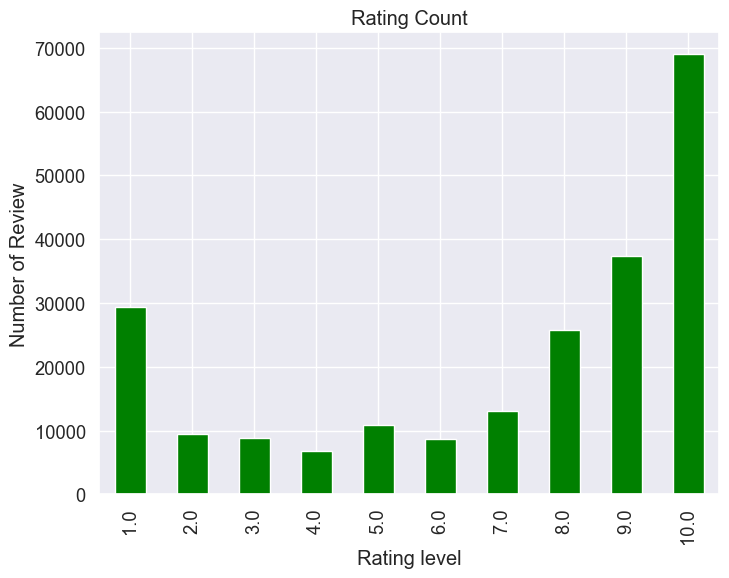

In [41]:
#Count different ratings
fig = plt.figure(figsize=(8,6))
totaldata.groupby('rating').review.count().plot.bar(ylim=0,color='green')
plt.xlabel('Rating level')
plt.ylabel('Number of Review')
plt.title("Rating Count")
plt.show()

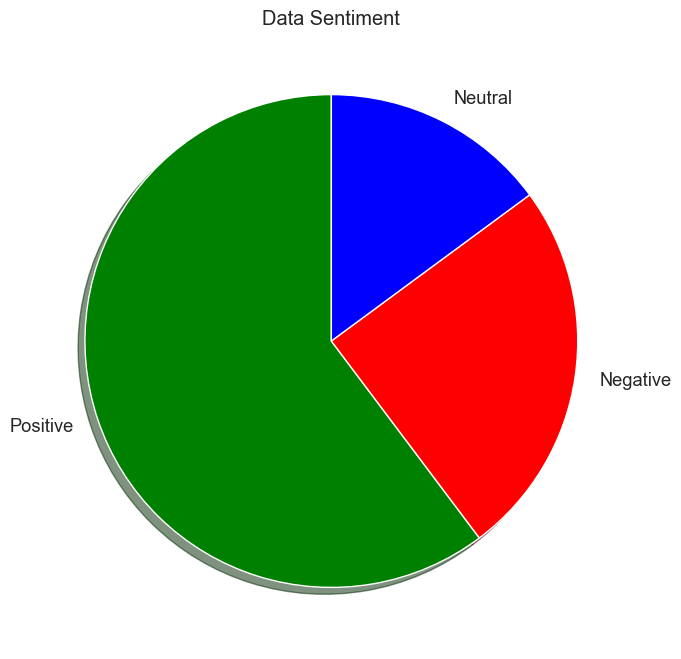

In [42]:
##Rating Divide Into Different Sentiments
conditions = [
    (totaldata['rating']<=4),
    (totaldata['rating']<8) & (totaldata['rating']>4),
    (totaldata['rating']<=10)& (totaldata['rating']>7)]
choices = ['negative','neutral','positive']
totaldata['label'] = np.select(conditions, choices, default='black')

from collections import Counter
sent=totaldata['label']
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative,neutral]
colors = ['green', 'red','blue']
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Data Sentiment")
plt.show()


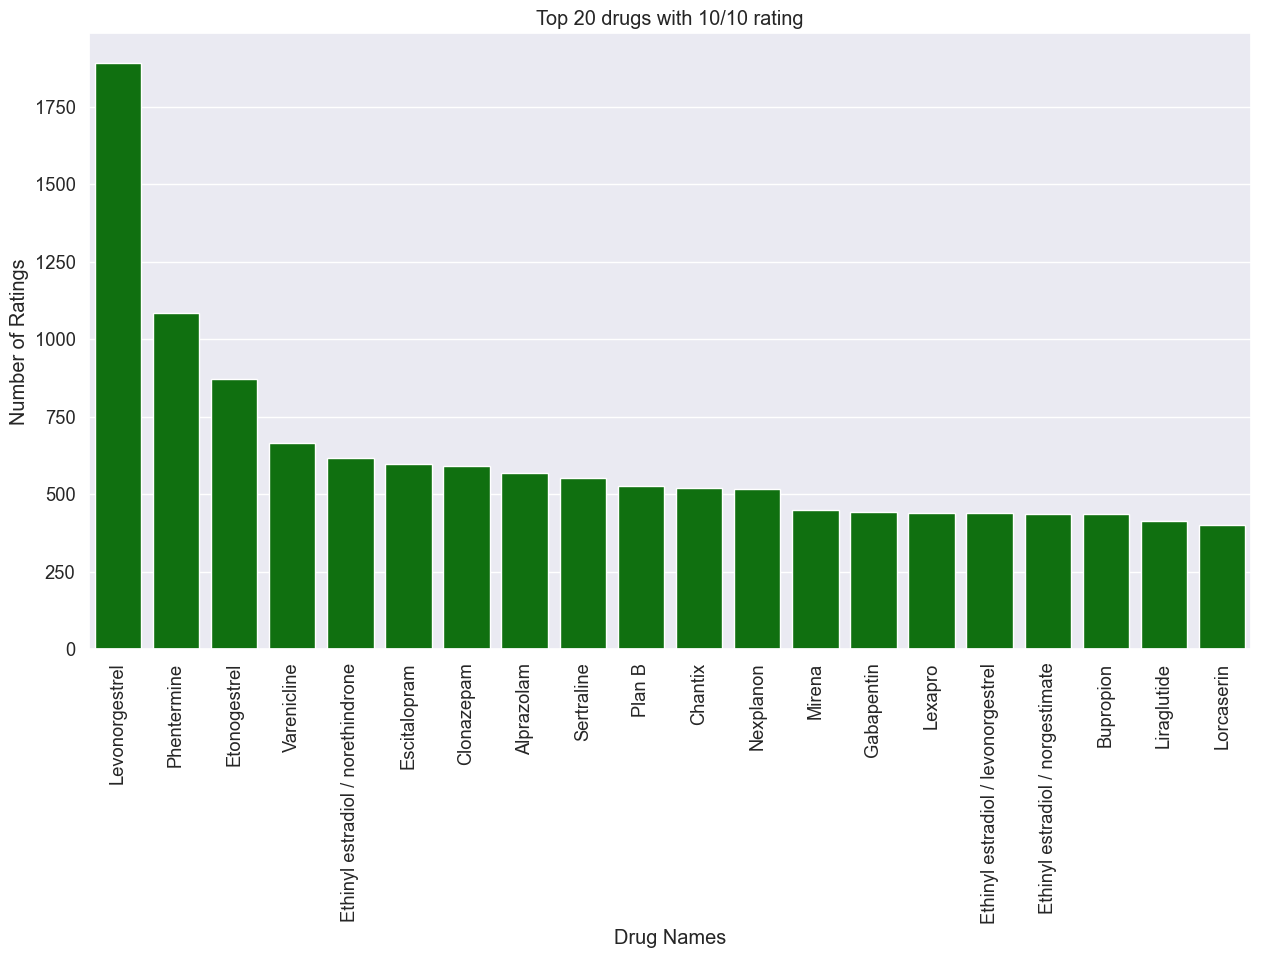

In [43]:
# Top 20 Drugs With 10/10 Ratings
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(totaldata.loc[totaldata.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color='green')

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



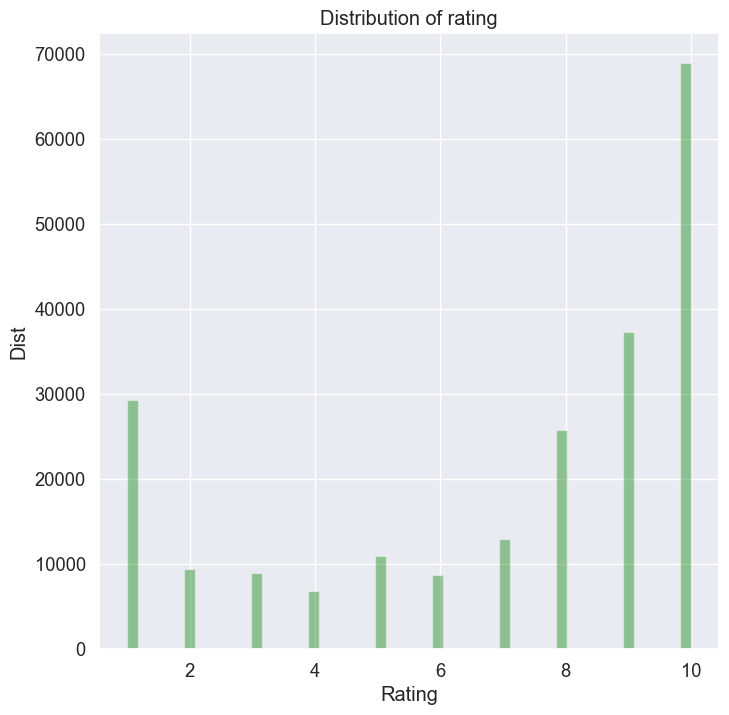

In [44]:
##Distribution Of Rating 


plt.figure(figsize=(8,8))
sns.distplot(totaldata['rating'], color='green', norm_hist=False, kde=False)

plt.xlabel('Rating')
plt.ylabel('Dist')
plt.title("Distribution of rating")
plt.show()


In [45]:
##CHeck Distribution Of Useful Count
totaldata["usefulCount"].describe()

count    219206.000000
mean         27.471785
std          36.202316
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [46]:
print(totaldata.groupby('condition')['rating'].mean())

condition
.                                                6.781590
0</span> users found this comment helpful.       6.054688
100</span> users found this comment helpful.     7.000000
105</span> users found this comment helpful.    10.000000
10</span> users found this comment helpful.      7.026316
                                                  ...    
year round allergies                             6.000000
yeast                                            5.000000
yeast diaper rash                                8.000000
yeast infection                                  6.166667
zen Shoulde                                      6.047619
Name: rating, Length: 2724, dtype: float64


/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



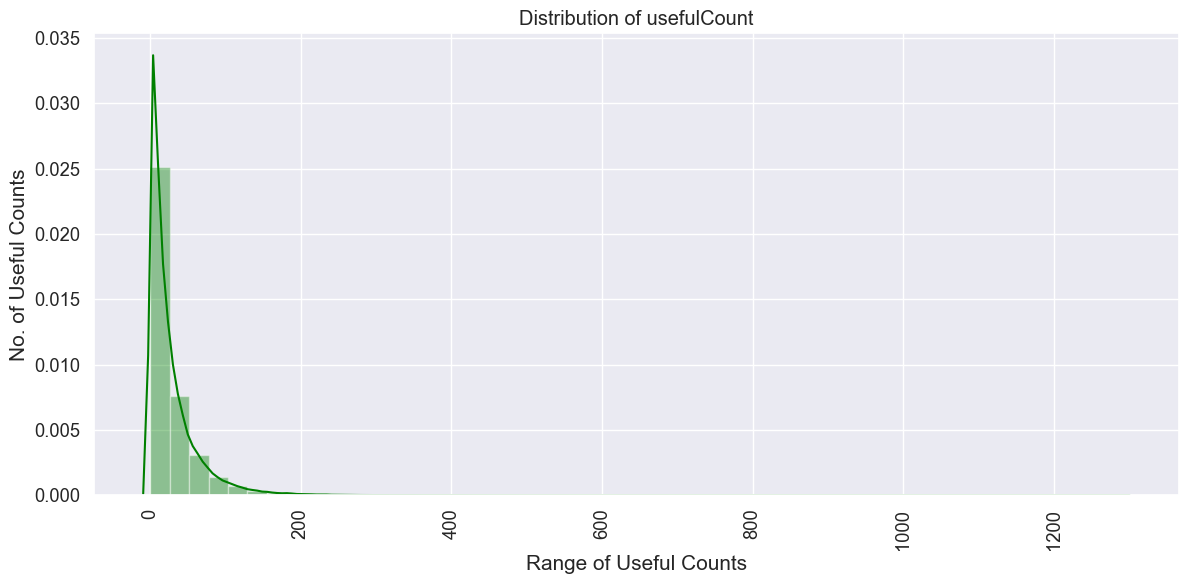

In [47]:
## UsefulCount Analysis
plt.figure(figsize=(14,6))
sns.distplot(totaldata["usefulCount"],color="green", kde=True)
plt.xticks(rotation='vertical')
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.title("Distribution of usefulCount")
plt.show()

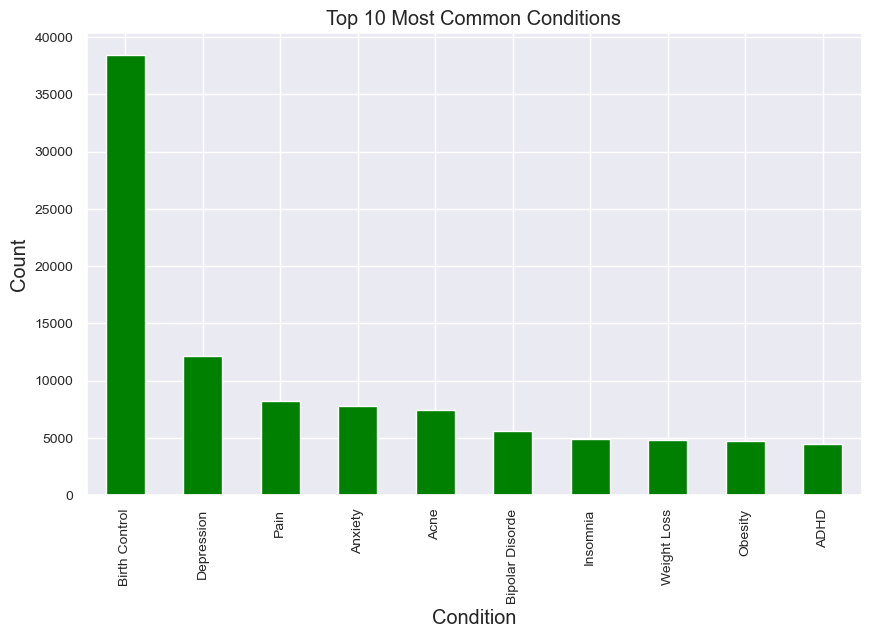

In [48]:
##Top Common Condition
totaldata["condition"].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', figsize = (10,6), fontsize = 10, color="green")
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

([<matplotlib.axis.XTick at 0x7f9947f14b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

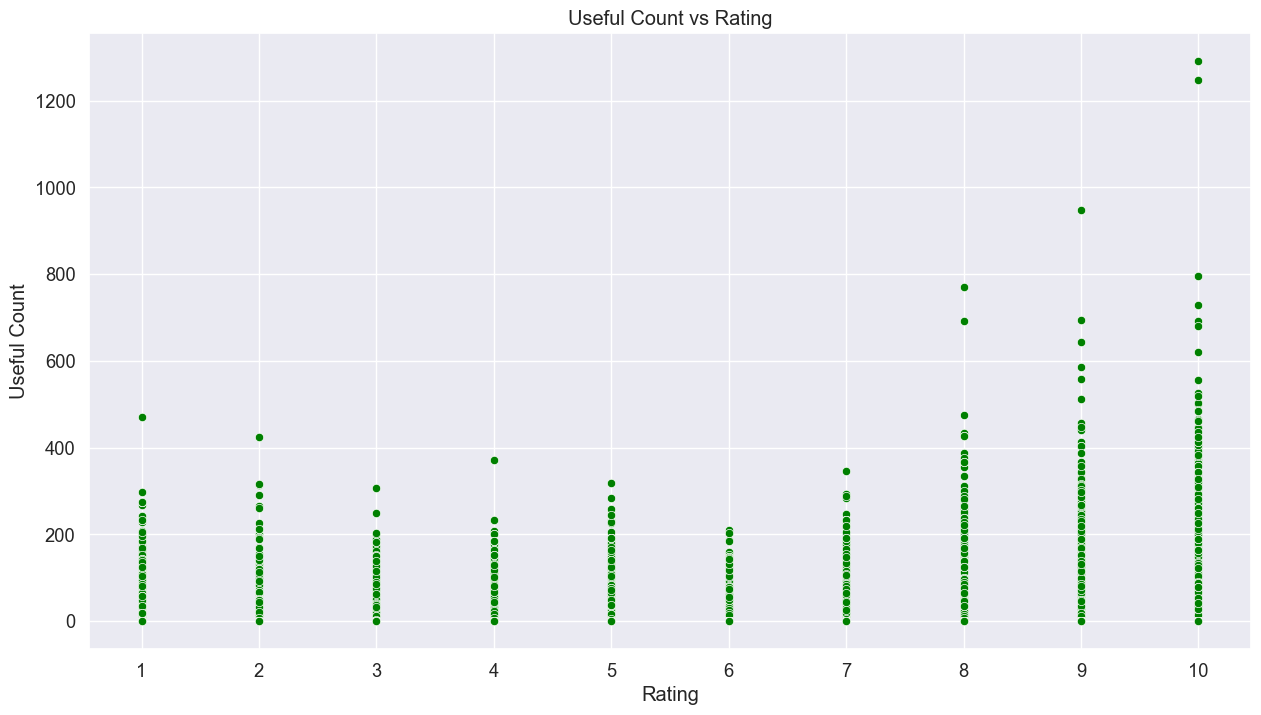

In [49]:
#sns.scatterplot(totaldata.rating, totaldata.usefulCount, color='green')
sns.scatterplot(x=totaldata.rating, y=totaldata.usefulCount, color='green')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)])

## TOKENIZATION & WORD CLOUD

/var/folders/gc/kzyhyn8s3djgdlnrbbc9wl580000gn/T/ipykernel_10820/4141293882.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



1000 : 2000
3000 : 4000
7000 : 8000
15000 : 16000
31000 : 32000
63000 : 64000
127000 : 128000
255000 : 256000


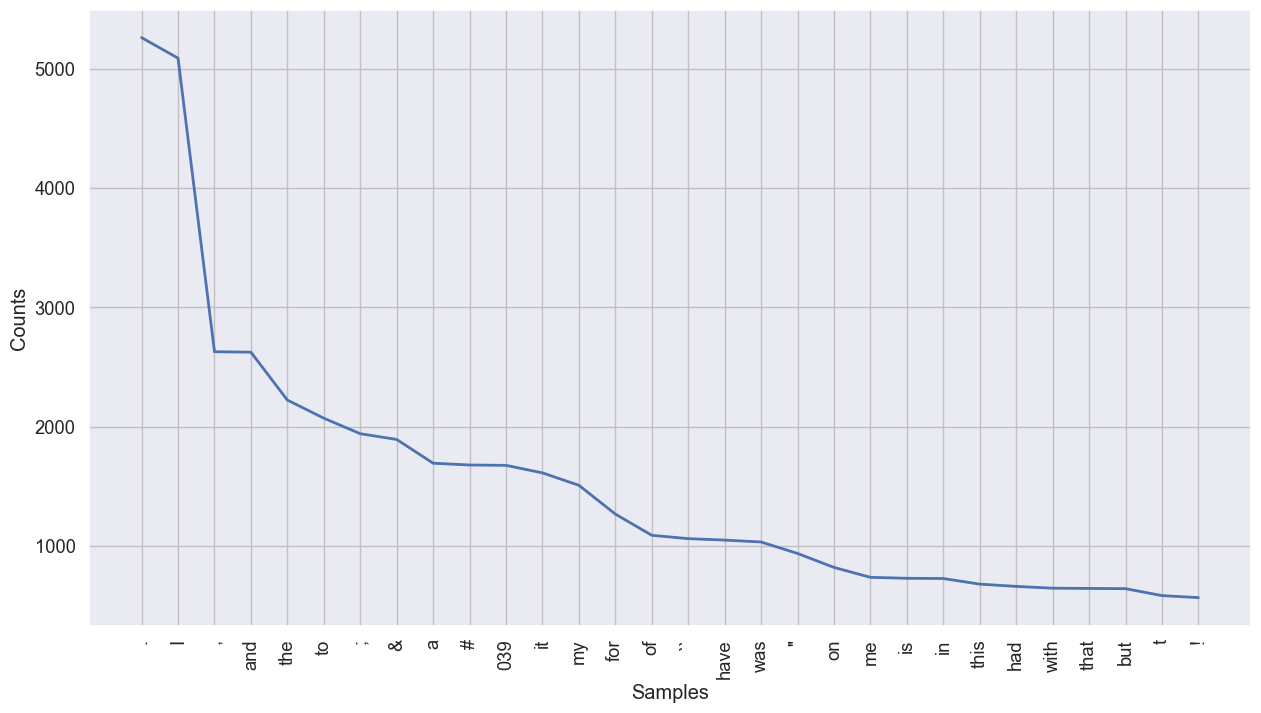

In [66]:
## Counfrom nltk.tokenize import word_tokenizet Frequent Words Used

# from nltk.tokenize import word_tokenize
size = len(totaldata)
i = 0
j = 1000
while i < size:
    txt = totaldata[i:j].review.str.replace(r'\|', ' ').str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(txt)
    word_dist = nltk.FreqDist(words)    
    i+= j
    j+=j
    print(i ,":", j)
word_dist.plot(30,cumulative=False)
plt.show()


In [67]:
## Show Most Frequent Words
commonwords = pd.DataFrame(word_dist.most_common(50), columns=['Word', 'Frequency'])
display(commonwords)

,Word,Frequency
0,.,5259
1,I,5087
2,",",2628
3,and,2624
4,the,2223
5,to,2071
6,;,1941
7,&,1893
8,a,1694
9,#,1679


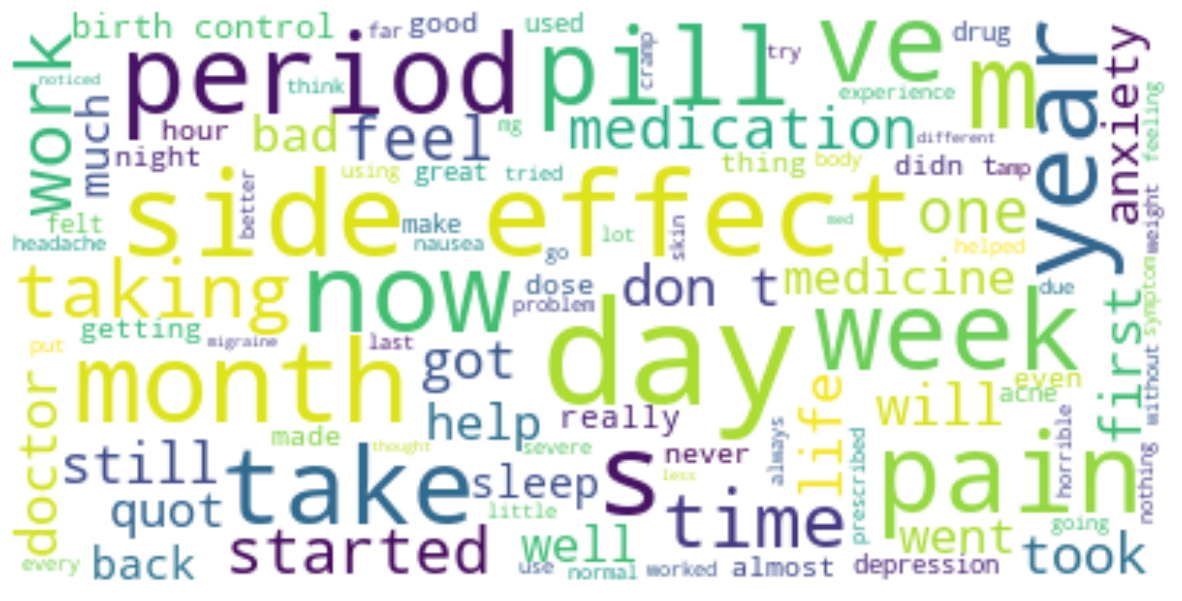

In [68]:
## Word Cloud Of TOkenized Words
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(txt)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

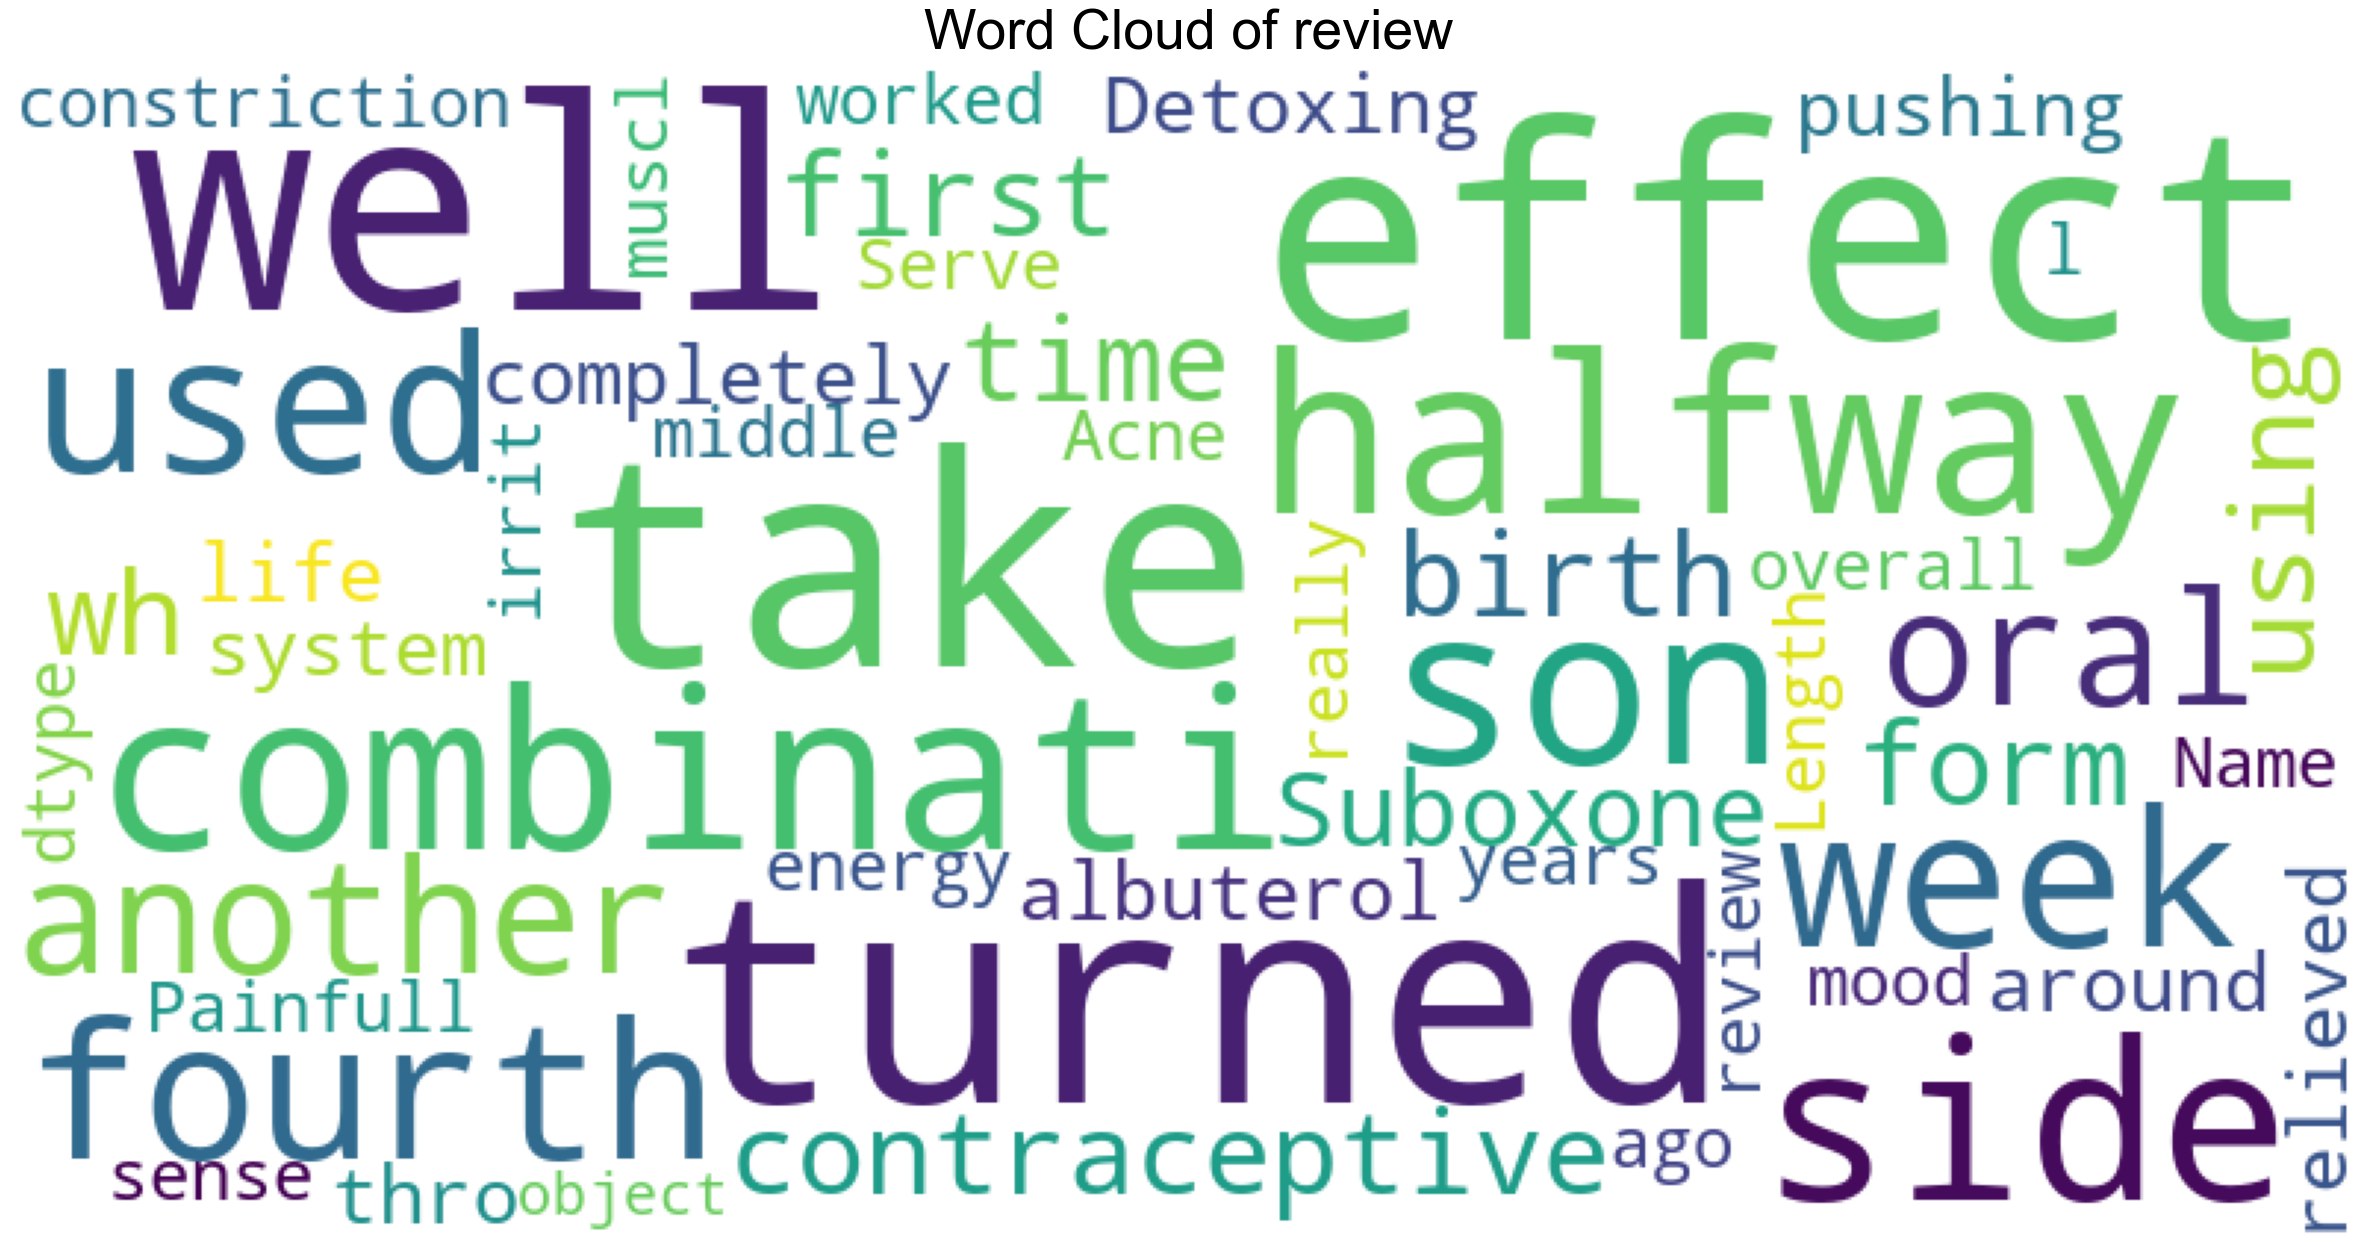

In [69]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
  wordcloud.generate(str(totaldata['review']))
  plt.figure(figsize=figure_size)
  if image_color:
        image_colors = wordcloud.ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
  else:
      plt.imshow(wordcloud);
      plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
  plt.axis('off');
  plt.tight_layout() 

plot_wordcloud(totaldata["review"], title="Word Cloud of review") 

In [70]:
totaldata_ratings_5_10 = totaldata[totaldata["rating"]>5]
totaldata_ratings_1_5 = totaldata[totaldata["rating"]<6]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Uni Gram Model

In [71]:
## Get the bar chart from rating  8 to 10 review ##
freq_dict = defaultdict(int)
for sent in totaldata_ratings_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 review ##
freq_dict = defaultdict(int)
for sent in totaldata_ratings_5_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Bi-Gram Model

In [72]:
freq_dict = defaultdict(int)
for sent in totaldata_ratings_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in totaldata_ratings_5_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Tri-Gram Model

In [73]:
freq_dict = defaultdict(int)
for sent in totaldata_ratings_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in totaldata_ratings_5_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of rating 1 to 5", 
                                          "Frequent trigrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Quad-Gram

In [74]:
freq_dict = defaultdict(int)
for sent in totaldata_ratings_1_5["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in totaldata_ratings_5_10["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent 4-grams of rating 1 to 5", 
                                          "Frequent 4-grams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots")
py.iplot(fig, filename='word-plots')

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Build Corpus

In [75]:
#Build corpus
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#stop words from NLTK
auto_remove = nltk.corpus.stopwords.words('english')
#Transform top 100 words as list
stopwords=commonwords['Word'].values.tolist()

#Combine auto and additional to the final stop word list
for w in auto_remove:
    if w not in stopwords:
        stopwords.append(w)

print(stopwords)

['.', 'I', ',', 'and', 'the', 'to', ';', '&', 'a', '#', '039', 'it', 'my', 'for', 'of', '``', 'have', 'was', "''", 'on', 'me', 'is', 'in', 'this', 'had', 'with', 'that', 'but', 't', '!', 'not', 'been', 'so', 'It', 'm', 'at', 'side', 's', 'day', 'has', 'now', 'about', 'as', 'am', 'no', 'pain', 'taking', 'My', 'after', 'effects', 'i', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', "that'll", 'these', 'those', 'are', 'were', 'be', 'being', 'having', 'do', 'does', 'did', 'doing', 'an', 'if', 'or', 'because', 'until', 'while', 'by', 'against', 'between', 'into', 'through', 'during', 'before', 'above', 'below', 'from', 'up', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',

## Review Text

In [76]:
not_stop = ["aren't","couldn't","didn't","doesn't","won't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stopwords.remove(i)

In [77]:
print(stopwords)

['.', 'I', ',', 'and', 'the', 'to', ';', '&', 'a', '#', '039', 'it', 'my', 'for', 'of', '``', 'have', 'was', "''", 'on', 'me', 'is', 'in', 'this', 'had', 'with', 'that', 'but', 't', '!', 'been', 'so', 'It', 'm', 'at', 'side', 's', 'day', 'has', 'now', 'about', 'as', 'am', 'pain', 'taking', 'My', 'after', 'effects', 'i', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', "that'll", 'these', 'those', 'are', 'were', 'be', 'being', 'having', 'do', 'does', 'did', 'doing', 'an', 'if', 'or', 'because', 'until', 'while', 'by', 'against', 'between', 'into', 'through', 'during', 'before', 'above', 'below', 'from', 'up', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

In [78]:
def review_to_words(review): 
    lower1= review.str.lower()
    pattern_remove = lower1.replace("&#039;", "")
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')
    multiw_remove = whitespace_remove.replace(r'\s+',' ')
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')
    return dataframe
totaldata['review_clean'] = review_to_words(totaldata['review'])

In [79]:
stemmer = SnowballStemmer('english')
def review_to_words2(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stopwords]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))
totaldata['review_clean'] = totaldata['review'].apply(review_to_words2)

/Users/minazaeimzadeh/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [80]:
totaldata.head(10)

,drugName,condition,review,rating,usefulCount,label,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,43.0,negative,nd mg start work rock hard erect howev experia...
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,5.0,negative,pull cum bit took plan b hour later took pregn...
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,32.0,positive,abilifi chang life hope zoloft clonidin first ...
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,11.0,negative,noth problem keppera constant shake arm leg pi...
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,1.0,positive,pill mani year doctor chang rx chateal effect ...


In [81]:
##Removing STOP WORDS 
totaldata['review_clean'] = totaldata['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))
totaldata.head(5)

,drugName,condition,review,rating,usefulCount,label,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...


In [82]:
## Removing STEM WORDS
totaldata['review_clean'] = totaldata['review_clean'].apply(lambda x: " ".join(stemmer.stem(word) for word in x.split()))

In [83]:
totaldata.head(5)

,drugName,condition,review,rating,usefulCount,label,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...


## Encoding 

In [84]:
labelencoding = preprocessing.LabelEncoder()
df_condition_label = totaldata[['drugName', 'condition']].apply(labelencoding.fit_transform)
df_condition_label.columns = ['drugName','condition_label']

In [85]:
totaldata = pd.concat([totaldata, df_condition_label], axis=1)
totaldata.head(5)

,drugName,condition,review,rating,usefulCount,label,review_clean,drugName,condition_label
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil,3425,488
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...,1539,88
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...,1986,183
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...,2450,183
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...,554,601


## Sentimental Analysis

In [86]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/minazaeimzadeh/nltk_data...


True

In [87]:
sid = SentimentIntensityAnalyzer()
totaldata['ReviewScore'] = totaldata['review_clean'].apply(lambda x: sid.polarity_scores(x)['compound'])
totaldata.head(10)

,drugName,condition,review,rating,usefulCount,label,review_clean,drugName,condition_label,ReviewScore
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil,3425,488,-0.2960
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...,1539,88,0.6929
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...,1986,183,0.2732
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...,2450,183,0.1027
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...,554,601,0.8934
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,43.0,negative,nd mg start work rock hard erect howev experia...,716,178,-0.4881
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,5.0,negative,pull cum bit took plan b hour later took pregn...,1877,322,0.0000
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,32.0,positive,abilifi chang life hope zoloft clonidin first ...,285,182,-0.8442
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,11.0,negative,noth problem keppera constant shake arm leg pi...,1782,332,-0.6808
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,1.0,positive,pill mani year doctor chang rx chateal effect ...,1265,183,-0.4857


## Feature Engineering 

In [88]:
## Feature Selection 
totaldata.head(5)

,drugName,condition,review,rating,usefulCount,label,review_clean,drugName,condition_label,ReviewScore
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27.0,positive,no effect take combin bystol mg fish oil,3425,488,-0.2960
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192.0,positive,son halfway fourth week intuniv becam concern ...,1539,88,0.6929
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17.0,neutral,use take anoth oral contracept pill cycl happi...,1986,183,0.2732
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10.0,positive,first time use form birth control glad went pa...,2450,183,0.1027
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37.0,positive,suboxon complet turn life around feel healthie...,554,601,0.8934


In [89]:
##Selecting Features

#Word count in each review
totaldata['count_word']=totaldata["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count 
totaldata['count_unique_word']=totaldata["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
totaldata['count_letters']=totaldata["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
totaldata["count_punctuations"] = totaldata["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
totaldata["count_words_upper"] = totaldata["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
totaldata["count_words_title"] = totaldata["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
totaldata["count_stopwords"] = totaldata["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

#Average length of the words
totaldata["mean_word_len"] = totaldata["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/Users/minazaeimzadeh/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.



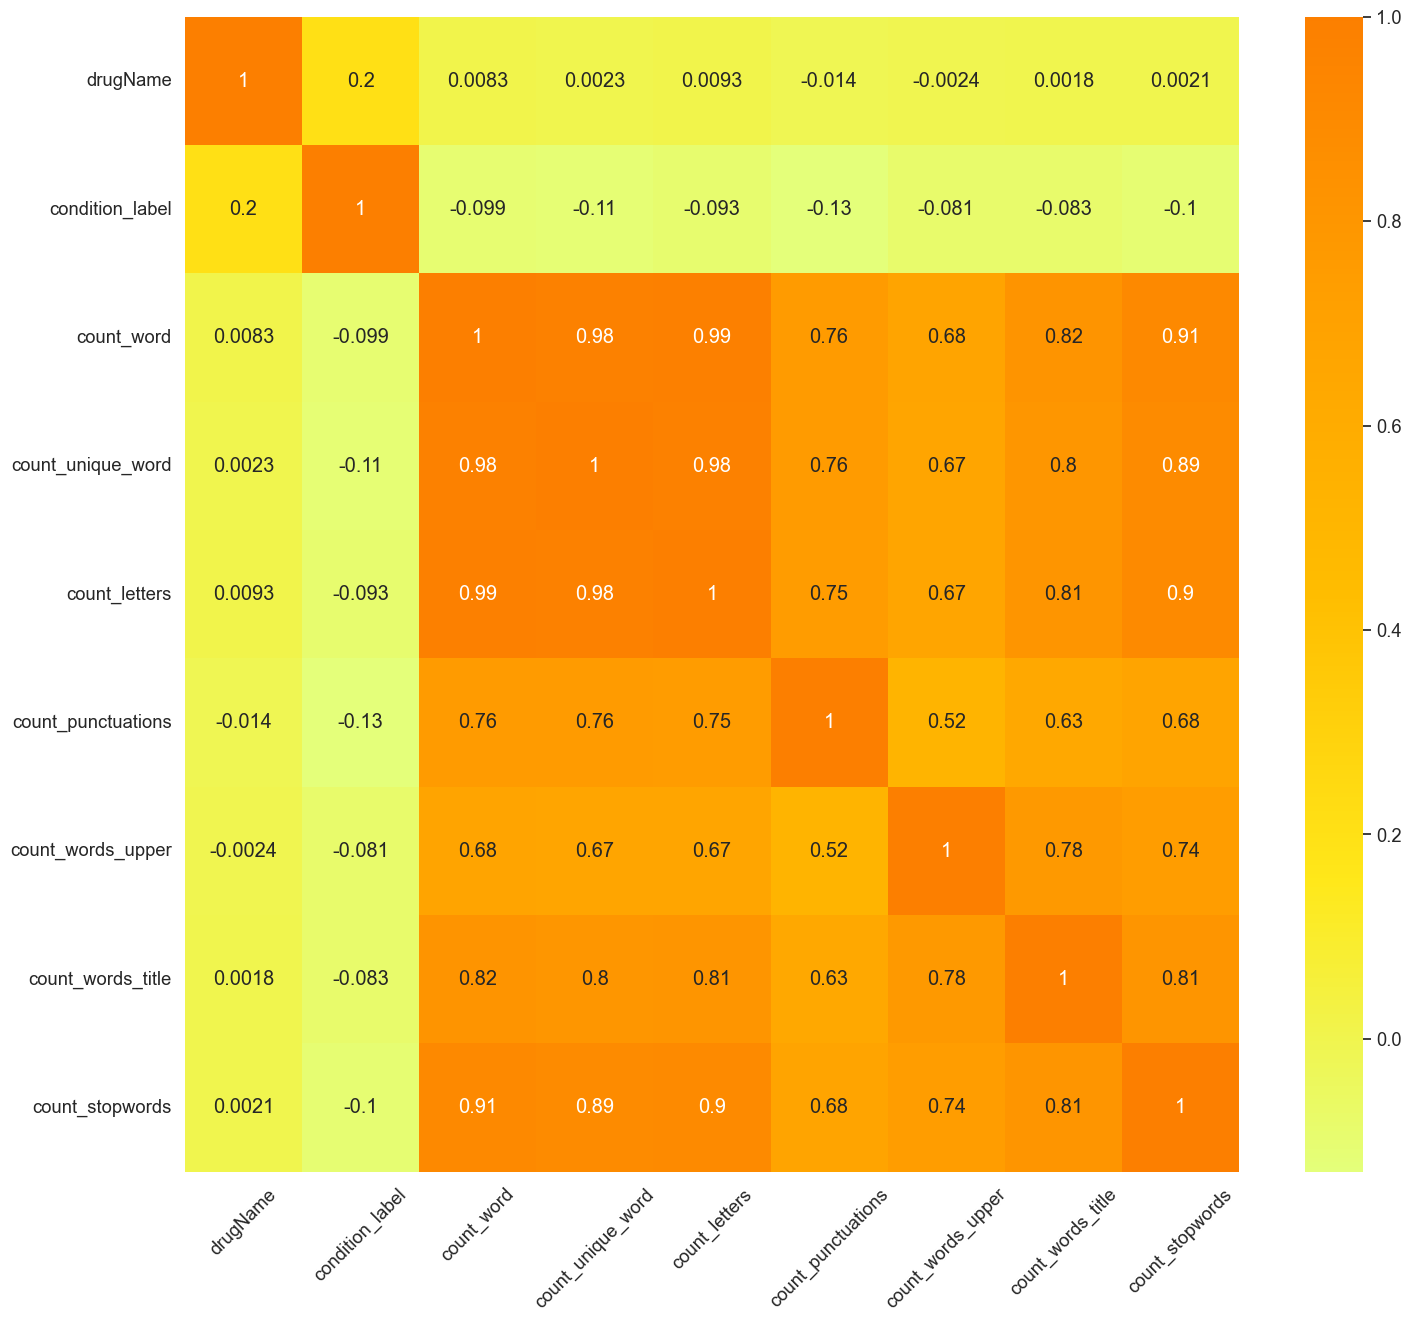

In [90]:
# Correlation Heatmap Method
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = totaldata.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

## FEATURE EXTRACTION & MODELLING

In [91]:
totaldata.to_csv("total_data_filtered.csv")

In [92]:
totaldataprocessed = pd.read_csv("total_data_filtered.csv")
print(totaldataprocessed.shape)

(219206, 19)


In [93]:
## Train & Test Split 
df_train, df_test = train_test_split(totaldataprocessed, test_size=0.05, random_state=42) 

In [100]:
##Count Vectorizer & TFID Feature Generation
def getNgramFeatures(minNgram, maxNgram, df_train, df_test, num_features = 2000):
    vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range = (minNgram, maxNgram),
                             max_features = num_features
                            )
    print(vectorizer)
    
    train_data_features = vectorizer.fit_transform(drugstraindata['review_clean'])
    test_data_features = vectorizer.transform(drugstestdata['review_clean'])
    
    return train_data_features, test_data_features, vectorizer


def getTFIDFFeatures(minNgram, maxNgram, df_train, df_test, num_features = 2000):
    vectorizer = TfidfVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range = (minNgram, maxNgram),
                             max_features = num_features
                            )
    print(vectorizer)
    
    train_data_features = vectorizer.fit_transform(df_train['review_clean'])
    test_data_features = vectorizer.transform(df_test['review_clean'])
    
    return train_data_features, test_data_features, vectorizer

cv = CountVectorizer(lowercase=True, stop_words=stopwords, ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(totaldata['review_clean'].values.astype(str))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(totaldata['review_clean'].values.astype(str))


In [101]:
#split train and test set from train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, totaldata['label'], test_size=0.3, random_state=1)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    text_tf, totaldata['label'], test_size=0.3, random_state=123)

In [104]:
entries=[]
df=pd.DataFrame(columns=['model_name', 'Vectors', 'accuracy'])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Functions for using different classifying models
def train_model(classifier, feature_vector_train, label, feature_vector_valid,valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    print(confusion_matrix(valid_y, predictions))
    print(classification_report(valid_y, predictions)) 
    
    #return metrics.accuracy_score(predictions, valid_y)
    return accuracy_score(valid_y, predictions)

In [106]:
from sklearn.naive_bayes import MultinomialNB


accuracy = train_model(MultinomialNB(), X_train, y_train, X_test,y_test)

#Entry accuracy to a list
entries.clear()
entries.append((MultinomialNB().__class__.__name__, "Count Vectors", accuracy))

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), X_train_tfidf, y_train_tfidf, X_test_tfidf,y_test_tfidf)

entries.append((MultinomialNB().__class__.__name__, "Word Level TF IDF Vectors", accuracy))

#transform list to dataframe
transformedataframe=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(transformedataframe)

[[10360  1503  4501]
 [ 2530  2649  4636]
 [ 3776  3631 32176]]
              precision    recall  f1-score   support

    negative       0.62      0.63      0.63     16364
     neutral       0.34      0.27      0.30      9815
    positive       0.78      0.81      0.80     39583

    accuracy                           0.69     65762
   macro avg       0.58      0.57      0.57     65762
weighted avg       0.67      0.69      0.68     65762

[[ 4105     4 12461]
 [  560    14  9174]
 [  381     6 39057]]
              precision    recall  f1-score   support

    negative       0.81      0.25      0.38     16570
     neutral       0.58      0.00      0.00      9748
    positive       0.64      0.99      0.78     39444

    accuracy                           0.66     65762
   macro avg       0.68      0.41      0.39     65762
weighted avg       0.68      0.66      0.56     65762



,model_name,Vectors,accuracy
0,MultinomialNB,Count Vectors,0.687099
1,MultinomialNB,Word Level TF IDF Vectors,0.656549
